<a href="https://colab.research.google.com/github/JefNtungila/DS-Unit-2-Regression-1/blob/master/Jef_Ntungila_assignment_evaluating_forecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib==3.0.1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JefNtungila/Data-story-telling-using-public-data-from-CERN-Run2010B-public-Mu-dataset-/master/Muon_wiki_pageviews-20180501-20190430.csv')
df = df.rename(columns={'Date':'ds', 'Muon':'y'})

In [4]:
df.columns.values

array(['ds', 'y'], dtype=object)

In [0]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [0]:
df = df.set_index('ds')

In [0]:
train = df['2015-07-01':'2018-12-31']
test = df['2019-01-01':'2019-05-10']

In [0]:
train = train.reset_index()
test = test.reset_index()

In [10]:
train['mean_baseline'] = train['y'].mean()
test['mean_baseline']  = train['y'].mean()
print('Average Muon wikipedia page viewers:', train['y'].mean())
print('Average Muon wikipedia page viewers:', test['y'].mean())

Average Muon wikipedia page viewers: 647.55
Average Muon wikipedia page viewers: 642.5384615384615


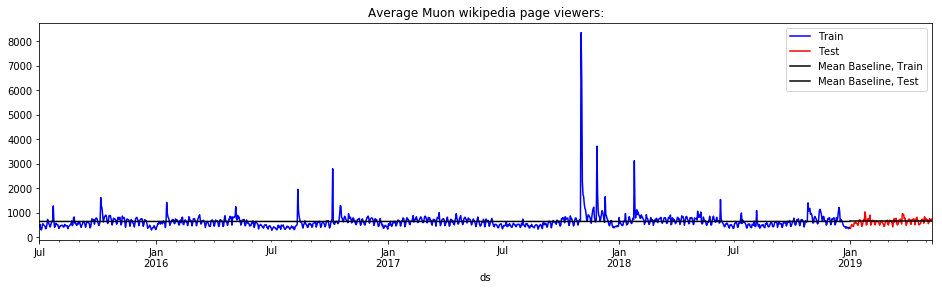

In [11]:
ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
train.plot(x='ds', y='mean_baseline', color='black', 
           label='Mean Baseline, Train', ax=ax)
test.plot(x='ds', y='mean_baseline', color='black', 
          label='Mean Baseline, Test', ax=ax)
plt.title('Average Muon wikipedia page viewers:');

In [0]:
train['naive_baseline'] = train['y'].shift(1).bfill()
train_last_observation = train['naive_baseline'].iloc[-1]
test['naive_baseline'] = train_last_observation

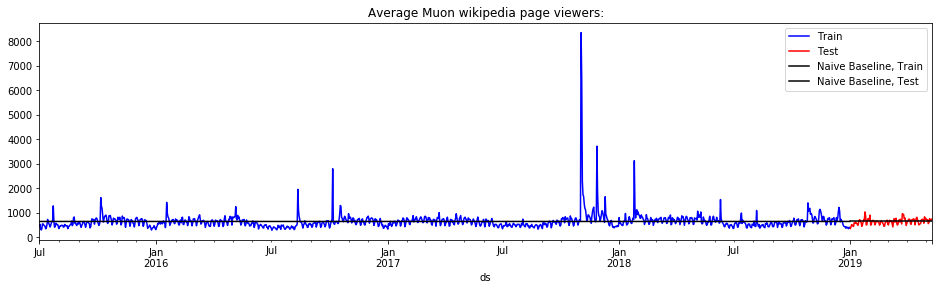

In [13]:
ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
train.plot(x='ds', y='mean_baseline', color='black', 
           label='Naive Baseline, Train', ax=ax)
test.plot(x='ds', y='mean_baseline', color='black', 
          label='Naive Baseline, Test', ax=ax)
plt.title('Average Muon wikipedia page viewers:');

In [0]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


In [0]:
pd.plotting.register_matplotlib_converters()

In [20]:
%%time
muon_model = Prophet(daily_seasonality=False)
muon_model.fit(train)
train_forecast = muon_model.predict(train)
test_forecast = muon_model.predict(test)

CPU times: user 7.8 s, sys: 2.53 s, total: 10.3 s
Wall time: 7.16 s


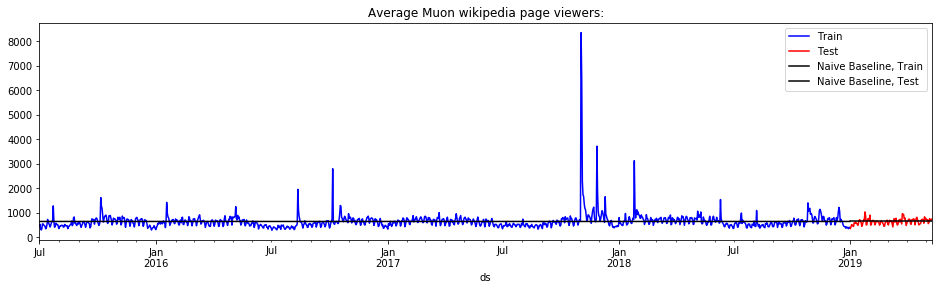

In [21]:
ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
train.plot(x='ds', y='mean_baseline', color='black', 
           label='Naive Baseline, Train', ax=ax)
test.plot(x='ds', y='mean_baseline', color='black', 
          label='Naive Baseline, Test', ax=ax)
plt.title('Average Muon wikipedia page viewers:');

In [23]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(muon_model, initial='730 days', 
                         horizon='365 days', period='180 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2017-07-04 00:00:00 and 2017-12-31 00:00:00


In [24]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
725,2018-12-27,1113.206613,668.981225,1557.627654,407,2017-12-31
726,2018-12-28,1020.902698,593.157155,1485.481060,383,2017-12-31
727,2018-12-29,863.613585,438.604776,1296.903737,352,2017-12-31
728,2018-12-30,926.015641,471.530264,1354.231868,415,2017-12-31
729,2018-12-31,1079.604782,614.606202,1506.473457,379,2017-12-31


In [25]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,82629.238669,287.453020,143.558310,0.195383,0.945205
1,38 days,82725.271925,287.620013,144.335513,0.196383,0.945205
2,39 days,83289.823475,288.599763,145.464342,0.197594,0.952055
3,40 days,83291.529293,288.602719,145.410093,0.197419,0.958904
4,41 days,83699.134135,289.308026,146.757186,0.199984,0.958904


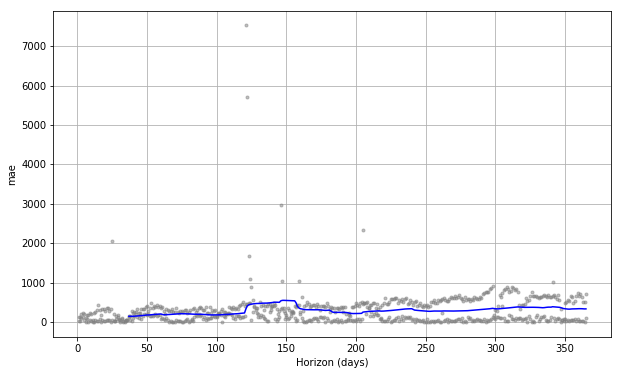

In [26]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')